In [ ]:
# limited size, put four sub hot spots in the edge of "+", using SGR 0418+5729 fitting results
# single hot spot

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D

# # physics constant
# c = 3 * 10 ** 10
# k_B = 8.617333262 * 10 ** (-5) # eV K-1, Boltzmann constant
# h = 4.135667696 * 10 ** (-15) # eV⋅Hz−1, Planck constant

# geometric input
# inclination angle
i = np.radians(54.59229606284669)
# hot spot parameter
theta_1 = np.radians(170.30032148969232)
phi_1 = np.radians(128.15356622008315)
norm_1 = 6.462363930124616
theta_2 = np.radians(172.0399266405045)
phi_2 = np.radians(251.3109205065553)
norm_2 = 18.615967112346844
theta_3 = np.radians(31.2795000977478)
phi_3 = np.radians(122.16917843409833)
norm_3 = 1.2833967237907484

T_1 = norm_1 ** (1 / 4)
T_2 = norm_2 ** (1 / 4)
T_3 = norm_3 ** (1 / 4)

# constant parameter (eV units)
c = 2.998 * 10 ** 10
D_10 = 2 # D_10 = distance / 10kpc
R_magnetar = 10 ** 6
k_B = 8.617 * 10 ** (-5)
K = R_magnetar ** 2 / D_10 ** 2 # normalization factor

# planck distribution
# def spectrum(x, T):
#     return (2 * x ** 3) / ((np.e ** (x / (k_B * T)) - 1) * c ** 2 * h ** 2)

# planck distribution in X-ray era
def spectrum(x, T):
    return (K * 1.0344 * 10 ** (-3) * x ** 2) / (np.e ** (x / k_B / T) - 1)


E = np.logspace(0, 500, 10000)
# E = h * nu (old version)

x_geometry = np.linspace(0, 1, 360)

spec_HS1 = spectrum(E, T_1)
spec_HS2 = spectrum(E, T_2)
spec_HS3 = spectrum(E, T_3)

f_lb = 1. / 3.

def mu(x, i, theta, phi, norm):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = norm * (y * (1. - f_lb) + f_lb)
    return F
def func(x, i, theta, phi, norm):
    return (abs(mu(x, i, theta, phi, norm)) + mu(x, i, theta, phi, norm)) / 2

HS1_geometry = func(x_geometry, i, theta_1, phi_1, norm_1)
HS2_geometry = func(x_geometry, i, theta_2, phi_2, norm_2)
HS3_geometry = func(x_geometry, i, theta_3, phi_3, norm_3)

fig = plt.figure(figsize = (12.0, 6.0), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = '3d')
# ax.plot(x_geometry, HS1_geometry, color = "blue")
# ax.plot(x_geometry, HS2_geometry, color = "orange")
# ax.plot(x_geometry, HS3_geometry, color = "red")
# plt.show()
# print(len(HS1_geometry))





# magnetar and its hot spots
r = 1.01
scale = 1
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(theta_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(theta_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(theta_1)
x_track_hs_2 = scale * r * np.sin(theta_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(theta_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(theta_2)
x_track_hs_3 = scale * r * np.sin(theta_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(theta_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(theta_3)
# x_track_hs_4 = scale * r * np.sin(a_4) * np.cos(theta_sphere)
# y_track_hs_4 = scale * r * np.sin(a_4) * np.sin(theta_sphere)
# z_track_hs_4 = scale * r * np.cos(a_4)
# ax2.scatter(x_track_hs_4, y_track_hs_4, z_track_hs_4, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(theta_1) * np.cos(phi_1)
x_hs_2 = scale * r * np.sin(theta_2) * np.cos(phi_2)
x_hs_3 = scale * r * np.sin(theta_3) * np.cos(phi_3)
# x_hs_4 = scale * r * np.sin(a_4) * np.cos(c_4)
y_hs_1 = scale * r * np.sin(theta_1) * np.sin(phi_1)
y_hs_2 = scale * r * np.sin(theta_2) * np.sin(phi_2)
y_hs_3 = scale * r * np.sin(theta_3) * np.sin(phi_3)
# y_hs_4 = scale * r * np.sin(a_4) * np.sin(c_4)
z_hs_1 = scale * r * np.cos(theta_1)
z_hs_2 = scale * r * np.cos(theta_2)
z_hs_3 = scale * r * np.cos(theta_3)
# z_hs_4 = scale * r * np.cos(a_4)

# x_hs = [x_hs_1, x_hs_2, x_hs_3, x_hs_4]
# y_hs = [y_hs_1, y_hs_2, y_hs_3, y_hs_4]
# z_hs = [z_hs_1, z_hs_2, z_hs_3, z_hs_4]
x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]






for j in range(0, len(x_geometry)):
    ax1.cla()
    ax2.cla()
    
    spec_HS1_obs = spec_HS1 * HS1_geometry[j]
    spec_HS2_obs = spec_HS2 * HS2_geometry[j]
    spec_HS3_obs = spec_HS3 * HS3_geometry[j]
    spec_total_obs = spec_HS1_obs + spec_HS2_obs + spec_HS3_obs
    ax1.plot(E, spec_HS1_obs, color = "blue")
    ax1.plot(E, spec_HS2_obs, color = "orange")
    ax1.plot(E, spec_HS3_obs, color = "red")
    ax1.plot(E, spec_total_obs, color = "lime")
    ax1.set_ylim(0.000001, 0.001)
    ax1.set_xlim(0.000001, 0.1)
    ax1.set_xlabel("Energy[eV]")
    ax1.set_ylabel("A(E)")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    phi_tmp = j
    
    ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)
    ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
    ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
    ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")
    ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
    ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
    ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_zlim(-1.1, 1.1)
    ax2.view_init(elev = np.degrees(i), azim = phi_tmp)
    ax2.axis("off")
    
    plt.savefig("image/" + str(j) + ".png"

0.2263853067224335
0.13070361777677295
0.975585084551959


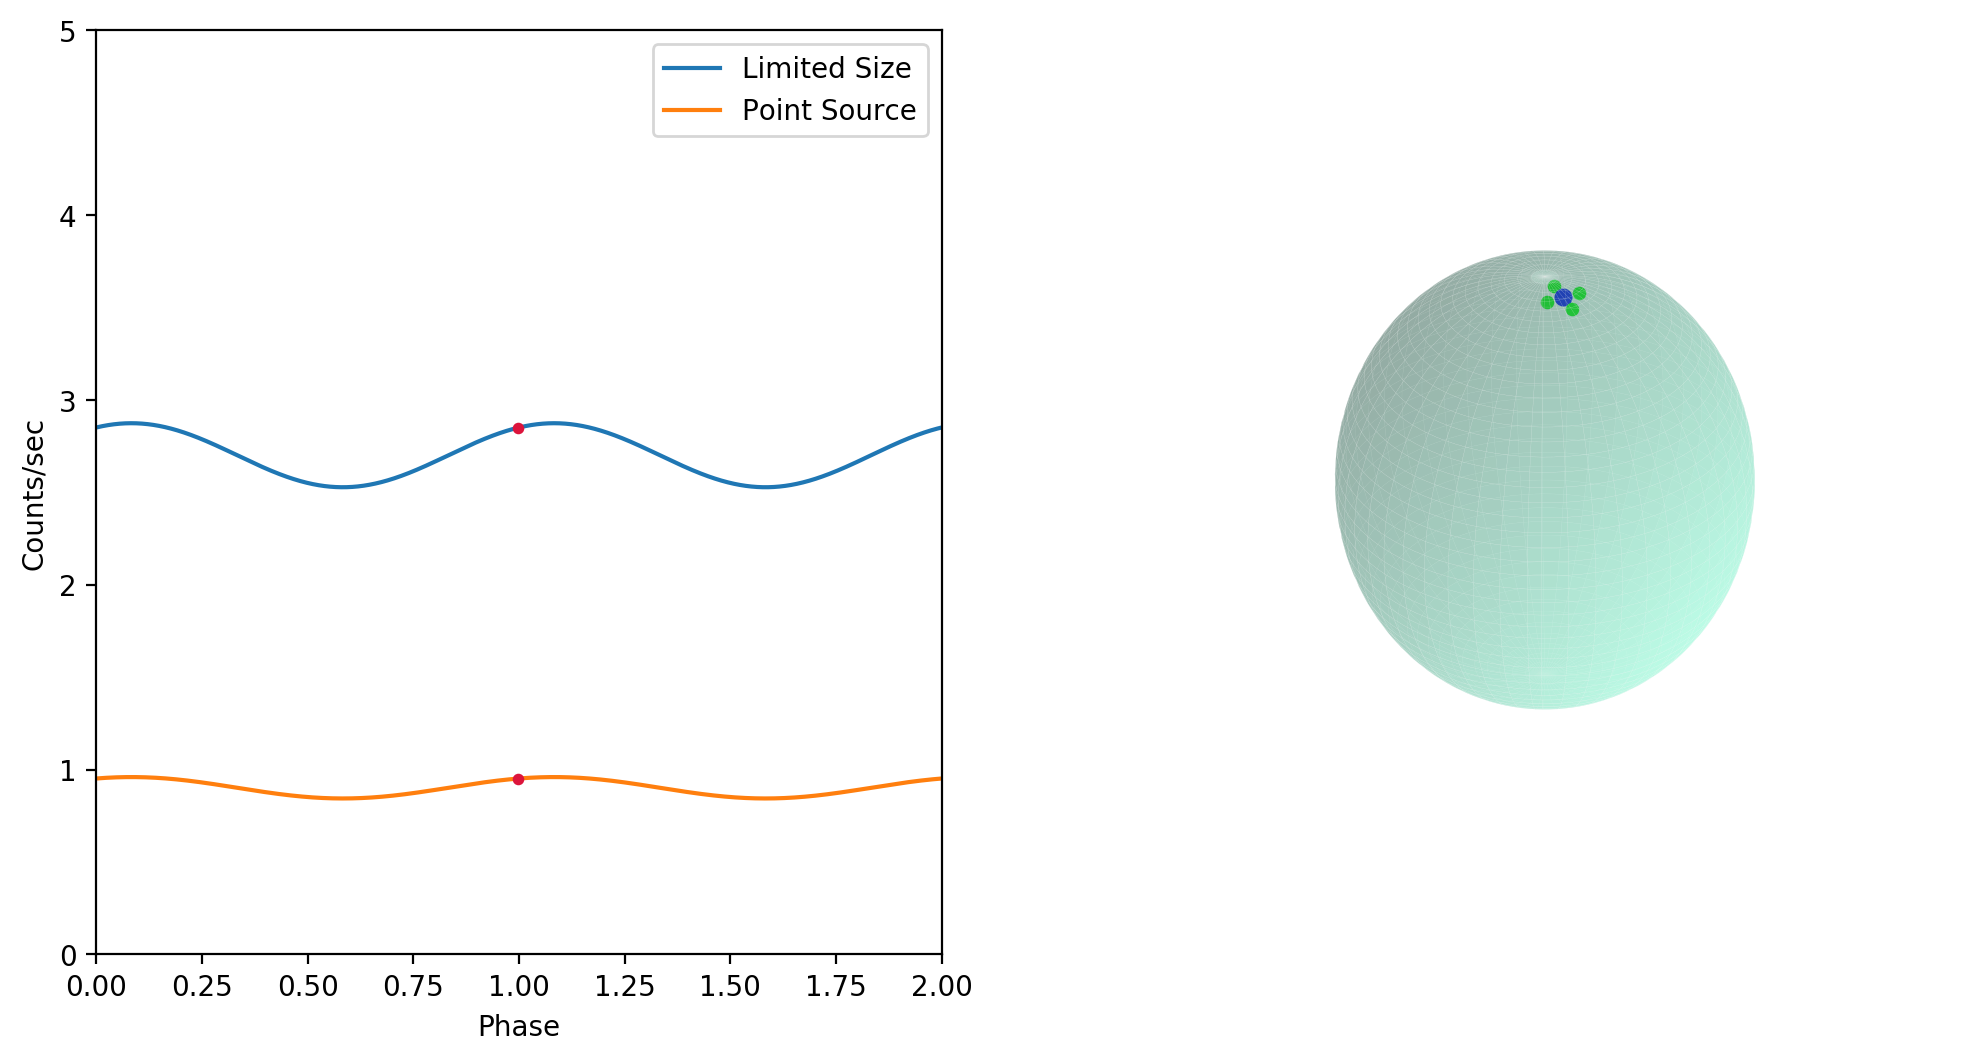

In [6]:
# limited size, put four sub hot spots in the edge of "+", using SGR 0418+5729 fitting results
# single hot spot

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D


# parameter section (degrees)
# inclination
i = np.radians(30)
# main hot spot, sub hot spot
theta_main = np.radians(10)
phi_main = np.radians(30)
angle_sub = np.radians(5)
m_main = 1
m_sub = 0.5

r = 1.01
scale = 1
x_hs_sub_1 = scale * r * np.sin(angle_sub) * np.cos(np.radians(0))
y_hs_sub_1 = scale * r * np.sin(angle_sub) * np.sin(np.radians(0))
z_hs_sub_1 = scale * r * np.cos(angle_sub)
x_hs_sub_2 = scale * r * np.sin(angle_sub) * np.cos(np.radians(90))
y_hs_sub_2 = scale * r * np.sin(angle_sub) * np.sin(np.radians(90))
z_hs_sub_2 = scale * r * np.cos(angle_sub)
x_hs_sub_3 = scale * r * np.sin(angle_sub) * np.cos(np.radians(180))
y_hs_sub_3 = scale * r * np.sin(angle_sub) * np.sin(np.radians(180))
z_hs_sub_3 = scale * r * np.cos(angle_sub)
x_hs_sub_4 = scale * r * np.sin(angle_sub) * np.cos(np.radians(270))
y_hs_sub_4 = scale * r * np.sin(angle_sub) * np.sin(np.radians(270))
z_hs_sub_4 = scale * r * np.cos(angle_sub)

sub_xyz_1 = np.array([[x_hs_sub_1], [y_hs_sub_1], [z_hs_sub_1]])
sub_xyz_2 = np.array([[x_hs_sub_2], [y_hs_sub_2], [z_hs_sub_2]])
sub_xyz_3 = np.array([[x_hs_sub_3], [y_hs_sub_3], [z_hs_sub_3]])
sub_xyz_4 = np.array([[x_hs_sub_4], [y_hs_sub_4], [z_hs_sub_4]])

phi_rot = -phi_main
theta_rot = -theta_main

z_rot = np.mat([[np.cos(phi_rot), np.sin(phi_rot), 0], [-np.sin(phi_rot), np.cos(phi_rot), 0], [0, 0 ,1]])
y_rot = np.mat([[np.cos(theta_rot), 0, -np.sin(theta_rot)], [0, 1, 0], [np.sin(theta_rot), 0, np.cos(theta_rot)]])

sub_XYZ_1 = np.dot(z_rot, np.dot(y_rot, sub_xyz_1))
sub_XYZ_2 = np.dot(z_rot, np.dot(y_rot, sub_xyz_2))
sub_XYZ_3 = np.dot(z_rot, np.dot(y_rot, sub_xyz_3))
sub_XYZ_4 = np.dot(z_rot, np.dot(y_rot, sub_xyz_4))

print(sub_XYZ_1[0, 0])
print(sub_XYZ_1[1, 0])
print(sub_XYZ_1[2, 0])

# sub_1 = (sub_XYZ_1[0][0], sub_XYZ_1[0][1], sub_XYZ_1[0][2])
# sub_2 = (sub_XYZ_1[0][0], sub_XYZ_1[0][1], sub_XYZ_1[0][2])
# sub_3 = 
# sub_4 = 

theta_sub_1 = np.arccos(sub_XYZ_1[2, 0] / (r * scale))
phi_sub_1 = np.arctan(sub_XYZ_1[1, 0] / sub_XYZ_1[0, 0])
theta_sub_2 = np.arccos(sub_XYZ_2[2, 0] / (r * scale))
phi_sub_2 = np.arctan(sub_XYZ_2[1, 0] / sub_XYZ_2[0, 0])
theta_sub_3 = np.arccos(sub_XYZ_3[2, 0] / (r * scale))
phi_sub_3 = np.arctan(sub_XYZ_3[1, 0] / sub_XYZ_3[0, 0])
theta_sub_4 = np.arccos(sub_XYZ_4[2, 0] / (r * scale))
phi_sub_4 = np.arctan(sub_XYZ_4[1, 0] / sub_XYZ_4[0, 0])


def mu(x, i, theta, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    result = (abs(F) + F) / 2
    return result

def mu_total(x, i, theta_main, phi_main, m_main, angle_sub, m_sub):
    Total = mu(x, i, theta_main, phi_main, m_main) + \
            mu(x, i, theta_sub_1, phi_sub_1, m_sub) + \
            mu(x, i, theta_sub_2, phi_sub_2, m_sub) + \
            mu(x, i, theta_sub_3, phi_sub_3, m_sub) + \
            mu(x, i, theta_sub_4, phi_sub_4, m_sub)
    return Total

x_pulse_profile = np.linspace(0, 2, 5000)
count_rates_single = mu(x_pulse_profile, i, theta_main, phi_main, m_main)
count_rates_total = mu_total(x_pulse_profile, i, theta_main, phi_main, m_main, angle_sub, m_sub)

# geometry phi (spin)
dx_p = 1 / 360
x_p = 0

# plot
fig = plt.figure(figsize = (12.0, 6.0), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = '3d')

HS_main_plot_size = 30
HS_sub_plot_size = m_sub / m_main * HS_main_plot_size

# magnetar and its hot spots
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# trajectory of HS
x_track_hs_main = scale * r * np.sin(theta_main) * np.cos(theta_sphere)
y_track_hs_main = scale * r * np.sin(theta_main) * np.sin(theta_sphere)
z_track_hs_main = scale * r * np.cos(theta_main)

# positions of HS_main
x_hs_main = scale * r * np.sin(theta_main) * np.cos(phi_main)
y_hs_main = scale * r * np.sin(theta_main) * np.sin(phi_main)
z_hs_main = scale * r * np.cos(theta_main)

# # positions of HS_sub
# x_hs_sub_1 = scale * r * np.sin(theta_main - angle_sub) * np.cos(phi_main)
# y_hs_sub_1 = scale * r * np.sin(theta_main - angle_sub) * np.sin(phi_main)
# z_hs_sub_1 = scale * r * np.cos(theta_main - angle_sub)
# x_hs_sub_2 = scale * r * np.sin(theta_main + angle_sub) * np.cos(phi_main)
# y_hs_sub_2 = scale * r * np.sin(theta_main + angle_sub) * np.sin(phi_main)
# z_hs_sub_2 = scale * r * np.cos(theta_main + angle_sub)
# x_hs_sub_3 = scale * r * np.sin(theta_main) * np.cos(phi_main - angle_sub)
# y_hs_sub_3 = scale * r * np.sin(theta_main) * np.sin(phi_main - angle_sub)
# z_hs_sub_3 = scale * r * np.cos(theta_main)
# x_hs_sub_4 = scale * r * np.sin(theta_main) * np.cos(phi_main + angle_sub)
# y_hs_sub_4 = scale * r * np.sin(theta_main) * np.sin(phi_main + angle_sub)
# z_hs_sub_4 = scale * r * np.cos(theta_main)



for j in range(0, 360):
    ax1.cla()
    ax2.cla()
    
    # spec_HS1_obs = spec_HS1 * HS1_geometry[j]
    # spec_HS2_obs = spec_HS2 * HS2_geometry[j]
    # spec_HS3_obs = spec_HS3 * HS3_geometry[j]
    # spec_total_obs = spec_HS1_obs + spec_HS2_obs + spec_HS3_obs
    # ax1.plot(E, spec_HS1_obs, color = "blue")
    # ax1.plot(E, spec_HS2_obs, color = "orange")
    # ax1.plot(E, spec_HS3_obs, color = "red")
    # ax1.plot(E, spec_total_obs, color = "lime")
    # ax1.set_ylim(0.000001, 0.001)
    # ax1.set_xlim(0.000001, 0.1)
    # ax1.set_xlabel("Energy[eV]")
    # ax1.set_ylabel("A(E)")
    # ax1.set_xscale("log")
    # ax1.set_yscale("log")
    
    # pulse profile
    ax1.set_xlim(0, 2)
    ax1.set_ylim(0, 5)
    ax1.plot(x_pulse_profile, count_rates_total, label= "Limited Size")
    ax1.plot(x_pulse_profile, count_rates_single, label = "Point Source")
    ax1.legend()
    ax1.set_xlabel('Phase')
    ax1.set_ylabel('Counts/sec')
    ax1.scatter(x_p, mu_total(x_p, i, theta_main, phi_main, m_main, angle_sub, m_sub), zorder = 10, s = 10, color = "crimson")
    ax1.scatter(x_p, mu(x_p, i, theta_main, phi_main, m_main), zorder = 10, s = 10, color = "crimson")
    
    ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)
    ax2.scatter(x_hs_main, y_hs_main, z_hs_main, zorder = 3, s = HS_main_plot_size, c = "blue")
    ax2.scatter(sub_XYZ_1[0, 0], sub_XYZ_1[1, 0], sub_XYZ_1[2, 0], zorder = 3, s = HS_sub_plot_size, c = "lime")
    ax2.scatter(sub_XYZ_2[0, 0], sub_XYZ_2[1, 0], sub_XYZ_2[2, 0], zorder = 3, s = HS_sub_plot_size, c = "lime")
    ax2.scatter(sub_XYZ_3[0, 0], sub_XYZ_3[1, 0], sub_XYZ_3[2, 0], zorder = 3, s = HS_sub_plot_size, c = "lime")
    ax2.scatter(sub_XYZ_4[0, 0], sub_XYZ_4[1, 0], sub_XYZ_4[2, 0], zorder = 3, s = HS_sub_plot_size, c = "lime")
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_zlim(-1.1, 1.1)
    ax2.view_init(elev = np.degrees(i), azim = x_p)
    ax2.axis("off")
    
    x_p += dx_p
    
    plt.savefig("image/" + str(j) + ".png")